<a class="anchor" id="0"></a>
# **Logistic Regression**



# Introduction 

It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

## **Implement linear equation**


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

    z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

    z = β0 + β1x1+ β2x2+……..+ βnxn
    
Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Making predictions**

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


# **Assumptions of Logistic Regression** <a class="anchor" id="3"></a>





The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# **Types of Logistic Regression** <a class="anchor" id="4"></a>


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


# **Libraries** <a class="anchor" id="5"></a>



In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
pd.set_option('display.max_column',None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA

In [3]:
df.shape

(145460, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Types of variables

In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()


Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


We can see that there are only 4 categorical variables in the dataset which contains missing values. These are `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [11]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [12]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa 

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [13]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of variables.

### Feature Engineering of Date Variable

In [14]:
df['Date'].dtypes

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

In [15]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [17]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [18]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [19]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [20]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,5


# Cycling Feature Encoding



A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

We can do that using the following transformations:

xsin=sin(2∗π∗xmax(x))

xcos=cos(2∗π∗xmax(x))


In [21]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [22]:
df = encode(df, 'Month', 12)
df = encode(df, 'Day', 31)

In [23]:
sample = df.drop_duplicates(subset=['Month'],keep = 'first')

<AxesSubplot:>

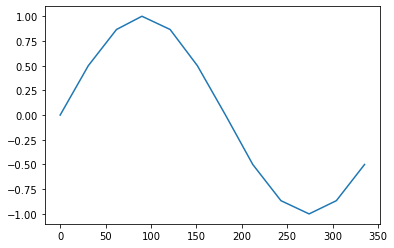

In [24]:
sample['Month_sin'].plot()

<AxesSubplot:>

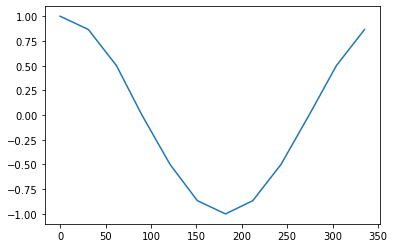

In [25]:
sample['Month_cos'].plot()

In [26]:
sample = df.drop_duplicates(subset=['Day'],keep = 'first')

<AxesSubplot:>

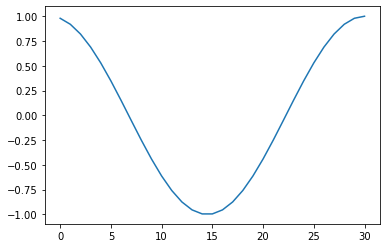

In [27]:
sample['Day_cos'].plot()

<AxesSubplot:>

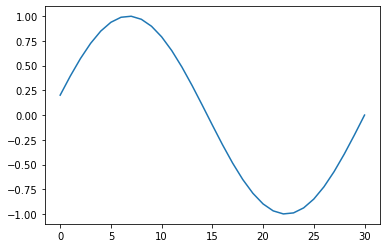

In [28]:
sample['Day_sin'].plot()

In [29]:
df.drop(['Day','Month'],axis=1,inplace=True)

### Explore Categorical Variables


Now, I will explore the categorical variables one by one. 

In [30]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [31]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [32]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [33]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [34]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [35]:

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [36]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [37]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [38]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [39]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

### Explore `WindDir9am` variable

In [41]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [42]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [43]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [44]:


pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

We can see that there are 10013 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [46]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [47]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [48]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [49]:


pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [51]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [52]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [53]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [54]:


pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [55]:

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [1]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

NameError: name 'df' is not defined

In [57]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month_sin,Month_cos,Day_sin,Day_cos
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,-2.449294e-16,1.0,0.201299,0.979530
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,-2.449294e-16,1.0,0.394356,0.918958
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,-2.449294e-16,1.0,0.571268,0.820763
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,-2.449294e-16,1.0,0.724793,0.688967
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,-2.449294e-16,1.0,0.848644,0.528964


### Summary of numerical variables


- There are 16 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [58]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Month_sin            0
Month_cos            0
Day_sin              0
Day_cos              0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [59]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'WindSpeed3pm')

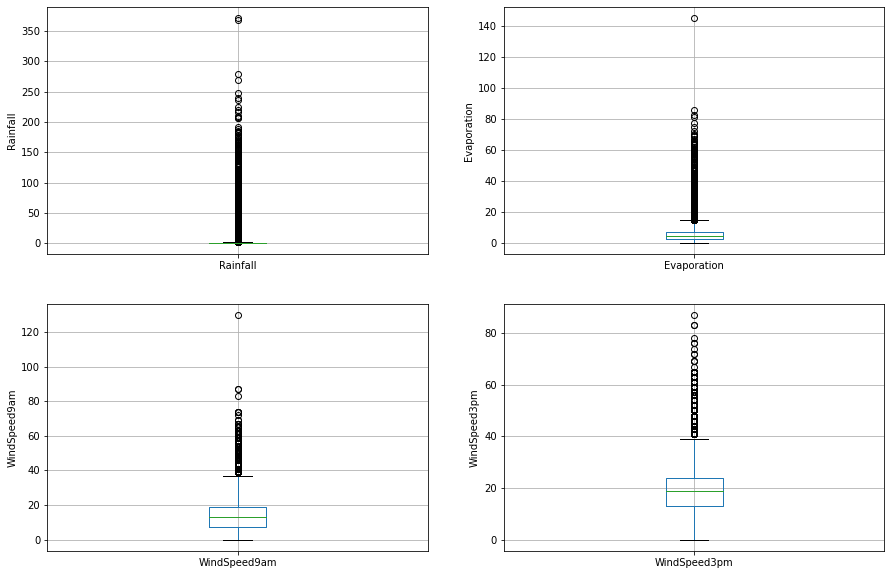

In [60]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

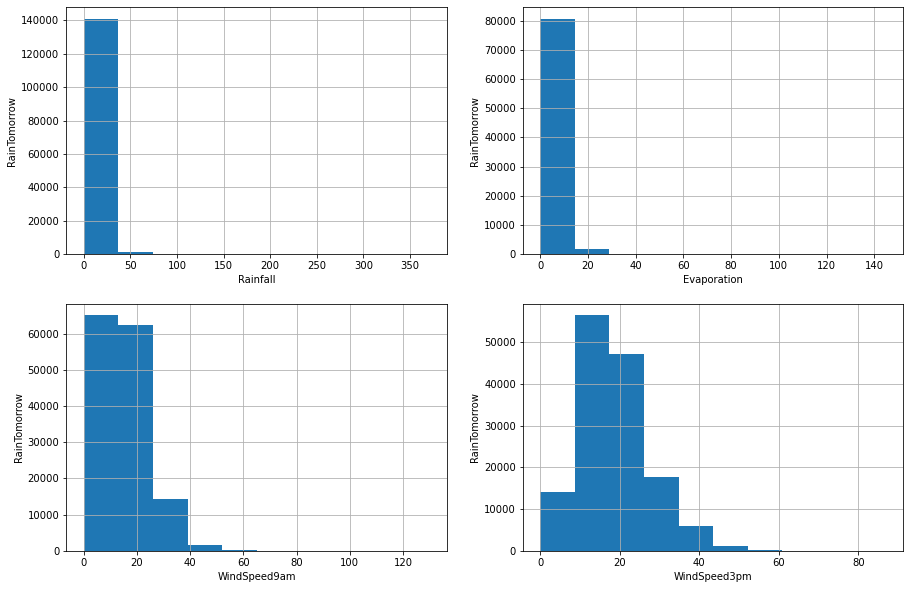

In [61]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [62]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [63]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [64]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [65]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

# Target 



In [66]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# **Split data into separate training and test set** 


In [67]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [68]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 25), (29092, 25))

#  Feature Engineering




In [69]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Month_sin        float64
Month_cos        float64
Day_sin          float64
Day_cos          float64
dtype: object

In [70]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [71]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month_sin',
 'Month_cos',
 'Day_sin',
 'Day_cos']

In [72]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']

### Engineering missing values in numerical variables



In [73]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Month_sin            0
Month_cos            0
Day_sin              0
Day_cos              0
dtype: int64

In [74]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Month_sin            0
Month_cos            0
Day_sin              0
Day_cos              0
dtype: int64

In [2]:
# Calculate information value
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()


    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data

In [76]:
num_bins = 5  
binned_data = df.copy() 

for column in numerical:
    print(column)
    
    binned_data[column + '_bin'] = pd.qcut(binned_data[column], num_bins, labels=False, duplicates='drop')



MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Month_sin
Month_cos
Day_sin
Day_cos


In [77]:
binned_data.RainTomorrow = [0 if i=='No' else 1 for i in binned_data.RainTomorrow]

In [78]:
cols = [col for col in binned_data.columns if col.endswith('_bin')]

In [79]:
 for colname in cols:
        print(colname)
        try:
            iv = calc_iv(binned_data,feature=colname, target='RainTomorrow')['IV'][0]
            original_col_name = colname[:-4]
            X_train[original_col_name].fillna(iv,inplace=True)
            X_test[original_col_name].fillna(iv,inplace=True)
        except:
            print(f'{colname} failed')
            X_train.drop(colname[:-4],axis=1,inplace=True)
            X_test.drop(colname[:-4],axis=1,inplace=True)

MinTemp_bin
MaxTemp_bin
Rainfall_bin
Evaporation_bin
Evaporation_bin failed
Sunshine_bin
Sunshine_bin failed
WindGustSpeed_bin
WindSpeed9am_bin
WindSpeed3pm_bin
Humidity9am_bin
Humidity3pm_bin
Pressure9am_bin
Pressure3pm_bin
Cloud9am_bin
Cloud3pm_bin
Cloud3pm_bin failed
Temp9am_bin
Temp3pm_bin
Month_sin_bin
Month_cos_bin
Day_sin_bin
Day_cos_bin


### Engineering missing values in categorical variables

In [80]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [81]:
# impute missing categorical variables with most frequent value

for temp in [X_train, X_test]:
    temp['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    temp['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    temp['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    temp['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [82]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [83]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [84]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
Month_sin        0
Month_cos        0
Day_sin          0
Day_cos          0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [85]:
def max_value(temp, variable, top):
    return np.where(temp[variable]>top, top, temp[variable])

for temp in [X_train, X_test]:
    temp['Rainfall'] = max_value(temp, 'Rainfall', 3.2)
    temp['WindSpeed9am'] = max_value(temp, 'WindSpeed9am', 55)
    temp['WindSpeed3pm'] = max_value(temp, 'WindSpeed3pm', 57)

In [86]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [87]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [88]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

### Encode categorical variables

In [89]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [90]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [91]:
train = pd.get_dummies(X_train,drop_first='True')

In [92]:
test = pd.get_dummies(X_test,drop_first='True')

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

#  Feature Scaling


In [93]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,Month_sin,Month_cos,Day_sin,Day_cos
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,1.163680e+05,1.163680e+05,1.163680e+05,116368.000000
mean,12.068640,23.006294,0.681060,37.246605,13.872474,18.287374,67.666528,50.031344,911.937584,910.022305,3.009023,16.776471,21.142327,1.182743e-02,-1.692816e-02,1.842606e-03,-0.019303
std,6.482445,7.404407,1.177617,16.619050,8.966577,9.103576,20.950111,22.231752,310.506336,309.483833,2.909681,6.712567,7.614135,7.056589e-01,7.082568e-01,7.129404e-01,0.700963
min,-8.500000,-4.800000,0.000000,0.265146,0.000000,0.000000,0.000000,0.000000,0.284146,0.234125,0.000000,-7.200000,-5.400000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869
25%,7.500000,17.800000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.800000,1008.400000,0.700577,12.100000,16.200000,-5.000000e-01,-8.660254e-01,-7.247928e-01,-0.758758
50%,11.900000,22.500000,0.000000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,16.600000,20.900000,1.224647e-16,-1.836970e-16,-2.449294e-16,-0.050649
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,21.500000,26.200000,5.000000e-01,5.000000e-01,7.247928e-01,0.688967
max,31.900000,48.100000,3.200000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,40.200000,46.700000,1.000000e+00,1.000000e+00,9.987165e-01,1.000000


In [94]:
cols = train.columns

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train = scaler.fit_transform(train)

test = scaler.transform(test)


In [96]:
train = pd.DataFrame(train, columns=[cols])

In [97]:
test = pd.DataFrame(test, columns=[cols])

In [98]:
[ i for i in train.columns if train[i].isnull().any()==True]

[]

In [99]:
y_train = [0 if i=='No' else 1 for i in y_train]
y_test = [0 if i=='No' else 1 for i in y_test]

#  Model training

In [100]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [101]:
train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,Month_sin,Month_cos,Day_sin,Day_cos,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.675743,0.538752,0.0625,0.383975,0.563636,0.491228,0.74,0.73,0.976555,0.975273,0.555556,0.603376,0.529750,1.000000,0.500000,0.826105,0.118359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.440594,0.544423,0.0625,0.354287,0.236364,0.421053,0.74,0.55,0.978188,0.975947,0.333333,0.453586,0.548944,0.066987,0.750000,0.969479,0.672813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480198,0.510397,0.4375,0.191004,0.000000,0.192982,0.85,0.47,0.977515,0.976236,0.111111,0.502110,0.516315,0.066987,0.250000,0.500000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.688119,0.655955,0.0000,0.317177,0.472727,0.298246,0.44,0.37,0.975882,0.973542,0.111111,0.641350,0.662188,0.500000,0.000000,0.895896,0.191874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599010,0.423440,1.0000,0.146472,0.200000,0.228070,1.00,1.00,0.975209,0.972002,0.888889,0.500000,0.435701,0.933013,0.250000,0.949479,0.277951,0.0,1.0,0.0,0.0,0.0,0.0,0.

#  Predict 



In [102]:
y_pred_test = logreg.predict(test)

y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [103]:
# probability of getting output as 0 - no rain

logreg.predict_proba(test)[:,0]

array([0.87300885, 0.86611381, 0.71899808, ..., 0.46331604, 0.66423224,
       0.95670857])

In [104]:
# probability of getting output as 1 - rain

logreg.predict_proba(test)[:,1]

array([0.12699115, 0.13388619, 0.28100192, ..., 0.53668396, 0.33576776,
       0.04329143])

# Performance

In [105]:
from sklearn.metrics import *
y_pred_test = logreg.predict(test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8245


### Compare the train-set and test-set accuracy

In [106]:
y_pred_train = logreg.predict(train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8233


### Check for overfitting and underfitting

In [107]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(test, y_test)))

Training set score: 0.8233
Test set score: 0.8245


In [108]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [109]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(test, y_test)))

Training set score: 0.8235
Test set score: 0.8246


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [110]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [111]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(test, y_test)))

Training set score: 0.8166
Test set score: 0.8176


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

# Confusion matrix




A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [112]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20844  1238]
 [ 3869  3141]]

True Positives(TP) =  20844

True Negatives(TN) =  3141

False Positives(FP) =  1238

False Negatives(FN) =  3869





- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20844


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3141


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1238 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3869 `(Type II error)`

<AxesSubplot:>

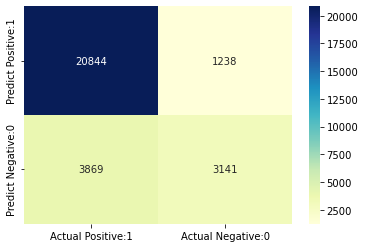

In [113]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices



## Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     22082
           1       0.72      0.45      0.55      7010

    accuracy                           0.82     29092
   macro avg       0.78      0.70      0.72     29092
weighted avg       0.81      0.82      0.81     29092



## Classification accuracy

In [115]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [116]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8245


## Classification error

In [117]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1755


## Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [118]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9439


## Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [119]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8434


## True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [120]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8434


## False Positive Rate

In [121]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2827


## Specificity

In [122]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7173


## f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.



### Lower the threshold

In [123]:
from sklearn.preprocessing import Binarizer
for i in range(1, 8):
    cm1 = 0
    
    y_pred1 = logreg.predict_proba(test)[:, 1]
    y_pred1 = y_pred1.reshape(-1, 1)
    
    binarizer = Binarizer(threshold=i/10)
    y_pred2 = binarizer.transform(y_pred1)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
    
    print(f"With {i/10} threshold, the Confusion Matrix is:\n\n{cm1}\n\n"
          f"With {cm1[0,0]+cm1[1,1]} correct predictions,\n\n"
          f"{cm1[0,1]} Type I errors (False Positives),\n\n"
          f"{cm1[1,0]} Type II errors (False Negatives),\n\n"
          f"Accuracy score: {accuracy_score(y_test, y_pred2)}\n\n"
          f"Sensitivity: {cm1[1,1]/(float(cm1[1,1]+cm1[1,0]))}\n\n"
          f"Specificity: {cm1[0,0]/(float(cm1[0,0]+cm1[0,1]))}\n\n"
          "====================================================\n\n")

With 0.1 threshold, the Confusion Matrix is:

[[10050 12032]
 [  592  6418]]

With 16468 correct predictions,

12032 Type I errors (False Positives),

592 Type II errors (False Negatives),

Accuracy score: 0.5660662725147807

Sensitivity: 0.9155492154065621

Specificity: 0.45512181867584456



With 0.2 threshold, the Confusion Matrix is:

[[15466  6616]
 [ 1494  5516]]

With 20982 correct predictions,

6616 Type I errors (False Positives),

1494 Type II errors (False Negatives),

Accuracy score: 0.7212292039048536

Sensitivity: 0.7868758915834522

Specificity: 0.7003894574766778



With 0.3 threshold, the Confusion Matrix is:

[[18223  3859]
 [ 2307  4703]]

With 22926 correct predictions,

3859 Type I errors (False Positives),

2307 Type II errors (False Negatives),

Accuracy score: 0.7880516980613227

Sensitivity: 0.6708987161198288

Specificity: 0.8252422787790961



With 0.4 threshold, the Confusion Matrix is:

[[19831  2251]
 [ 3125  3885]]

With 23716 correct predictions,

2251 T





## ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



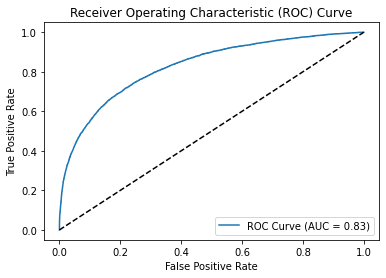

In [124]:
y_pred_prob = logreg.predict_proba(test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

## ROC-AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [126]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.8279
